<a href="https://colab.research.google.com/github/tarunkv169/topsis-model-ranking-on-text-sentence-similarity/blob/main/topsis_model_ranking_on_text_sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
def topsis(data, weights, impacts):

    scaler = MinMaxScaler()
    norm_data = scaler.fit_transform(data)


    wgt_data = norm_data * weights

    ideal_best = np.max(wgt_data, axis=0) if impacts[0] == '+' else np.min(wgt_data, axis=0)
    ideal_worst = np.min(wgt_data, axis=0) if impacts[0] == '+' else np.max(wgt_data, axis=0)


    dist_best = np.sqrt(np.sum((wgt_data - ideal_best) ** 2, axis=1))
    dist_worst = np.sqrt(np.sum((wgt_data - ideal_worst) ** 2, axis=1))


    topsis_score = dist_worst / (dist_best + dist_worst)

    return topsis_score

In [26]:

data = {
    'Model': ['BERT', 'RoBERTa', 'DistilBERT', 'GPT-3', 'Sentence-BERT'],
    'Accuracy': [0.92, 0.94, 0.89, 0.91, 0.95],
    'Inference Time (ms)': [120, 150, 80, 200, 90],
    'Memory Usage (MB)': [400, 450, 300, 500, 350]
}


In [27]:
df = pd.DataFrame(data)
df

,Model,Accuracy,Inference Time (ms),Memory Usage (MB)
0,BERT,0.92,120,400
1,RoBERTa,0.94,150,450
2,DistilBERT,0.89,80,300
3,GPT-3,0.91,200,500
4,Sentence-BERT,0.95,90,350


In [28]:

weights = [0.5, 0.3, 0.2]
impacts = ['+', '-', '-']

decision_matrix = df.iloc[:, 1:].values

In [29]:
topsis_scores = topsis(decision_matrix, weights, impacts)

In [30]:
df['TOPSIS Score'] = topsis_scores


df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

In [31]:
df

,Model,Accuracy,Inference Time (ms),Memory Usage (MB),TOPSIS Score,Rank
0,BERT,0.92,120,400,0.461308,4.0
1,RoBERTa,0.94,150,450,0.750460,1.0
2,DistilBERT,0.89,80,300,0.000000,5.0
3,GPT-3,0.91,200,500,0.543720,3.0
4,Sentence-BERT,0.95,90,350,0.616288,2.0


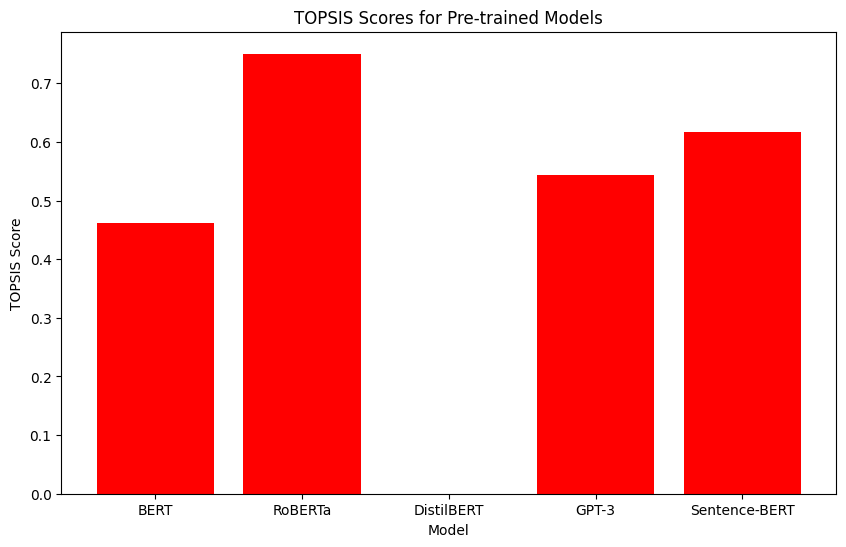

           Model  Accuracy  Inference Time (ms)  Memory Usage (MB)  \
1        RoBERTa      0.94                  150                450   
4  Sentence-BERT      0.95                   90                350   
3          GPT-3      0.91                  200                500   
0           BERT      0.92                  120                400   
2     DistilBERT      0.89                   80                300   

   TOPSIS Score  Rank  
1      0.750460   1.0  
4      0.616288   2.0  
3      0.543720   3.0  
0      0.461308   4.0  
2      0.000000   5.0  


In [32]:

plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['TOPSIS Score'], color='red')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Pre-trained Models')
plt.show()


print(df.sort_values(by='Rank'))